In [2]:
import pandas as pd
import numpy as np
# load the csv file
df=pd.read_csv('/Users/Vasile/IMDB_best', sep ='\t')

In [3]:
df.head()

,Unnamed: 0,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,0,tt0000001,short,Carmencita,0,1894.0,1.0,"Documentary,Short",5.8,1427,nm0005690,NaN
1,1,tt0000002,short,Le clown et ses chiens,0,1892.0,5.0,"Animation,Short",6.4,169,nm0721526,NaN
2,2,tt0000003,short,Pauvre Pierrot,0,1892.0,4.0,"Animation,Comedy,Romance",6.6,1025,nm0721526,NaN
3,3,tt0000004,short,Un bon bock,0,1892.0,NaN,"Animation,Short",6.4,101,nm0721526,NaN
4,4,tt0000005,short,Blacksmith Scene,0,1893.0,1.0,"Comedy,Short",6.2,1721,nm0005690,NaN


In [4]:
# delete the automatically created feature by saving the cvs file
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [6]:
df_no_missing= df.dropna()

In [93]:
df_no_missing.shape
# The dataset was considerably reduced, but we have enough data to train the model

(503139, 11)

In [8]:
df_no_missing.to_csv('IMDB_no_missing', sep='\t')

In [11]:
# drop the the title duplicates
movie_df=df_no_missing.drop_duplicates('primaryTitle')

In [122]:
movie_df.head()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
8,tt0000009,movie,Miss Jerry,0,1894.0,45.0,Romance,5.5,72,nm0085156,nm0085156
34,tt0000036,short,Awakening of Rip,0,1896.0,0.0,"Drama,Short",4.5,412,nm0005690,nm0410331
74,tt0000076,short,Exit of Rip and the Dwarf,0,1896.0,1.0,"Drama,Short",4.5,368,nm0005690,nm0410331
89,tt0000091,short,The House of the Devil,0,1896.0,3.0,"Horror,Short",6.7,2170,nm0617588,nm0617588
106,tt0000108,short,Rip Leaving Sleepy Hollow,0,1896.0,1.0,"Drama,Short",4.5,378,nm0005690,nm0410331


In [13]:
# clean the multiple categorical features
# These are genres, directors, writers
# transform the genres feature into dummies
cat_genres = movie_df.set_index('tconst').genres.str.split(',', expand=True).stack()
cleaned_genres = pd.get_dummies(cat_genres, prefix='g').groupby(level=0).sum()

In [ ]:
#Same process can be applied to directors and writers 

#cat_directors = movie_df.set_index('tconst').directors.str.split(',', expand=True).stack()
#cleaned_directors = pd.get_dummies(cat_directors, prefix='g').groupby(level=0).sum()
# I don't have the resources to create dummies for every director and writer and it does not make sense
# So, for now, I will drop directors and writers 

In [68]:
#I drop titleType because I cant seem to find how this parameter could affect the rating of a movie 
# genres is droped and replaced with the cleaned_genres
#for averageRating is created a new target feature
reduced_df = movie_df.drop(['writers','directors','genres', 'titleType','averageRating'], axis=1)
label =reduced_df['averageRating']


In [135]:
# NUMERIC FEATURE ENGINEERING 
# apply StandardScaler to remove the mean and scale to unit variance
scaler = preprocessing.StandardScaler()

df_numeric= reduced_df.select_dtypes(include=['int64','float64'])

scaler.fit(df_numeric)
df_numeric1 = scaler.transform(df_numeric)
df_numeric2 =pd.DataFrame(df_numeric1)
df_numeric2.head()

,0,1,2,3
0,-0.107296,-4.483606,-0.331080,-0.073883
1,-0.107296,-4.394225,-1.286437,-0.056885
2,-0.107296,-4.394225,-1.265206,-0.059085
3,-0.107296,-4.394225,-1.222746,0.031004
4,-0.107296,-4.394225,-1.265206,-0.058585


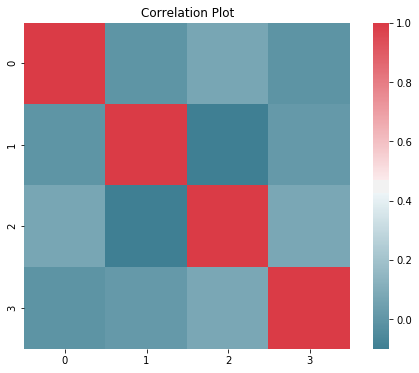

In [137]:
import seaborn as sns
#correlation between the numerical features
corr_df=df_numeric2.corr(method = 'pearson')
#plot it
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(corr_df, mask=np.zeros_like(corr_df, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
#there is no strong correlation between any two variables \ 
# The strongest one is around 0.2.
# All the numeric features are kept because there is no \
# strong evidence of data redundancy.

In [138]:
# Combine the standardized dataframe with the dummy categorical feature for genres
df_combined = np.concatenate([df_numeric2,cleaned_genres], axis=1)

In [139]:
# The first two features, representing an ID for each movie and its title, are not used in further analysis
# they just have the role to identify the movie
X = df_combined1.iloc[:,2:]
y = label

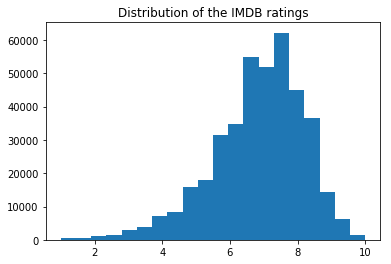

In [140]:
# IMDB ratings exploration
%matplotlib inline
import matplotlib.pyplot as plt
font = {'fontname':'Arial', 'size':'14'}
title_font = { 'weight' : 'bold','size':'16'}
plt.hist(label, bins=20)
plt.title("Distribution of the IMDB ratings")
plt.show()
# most of the movies have ratings between 6.5 and 7.5

In [103]:
# manual cross validation
# I decided to use the K-fold cross validation from sklearn, where K = 10
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.30)

In [106]:
#from sklearn.linear_model import LinearRegression 
#from sklearn.metrics import mean_squared_error
#lin_reg = LinearRegression()
#lin_reg.fit(X_train, y_train)
#pred_train_reg=lin_reg.predict(X_train)
#print mean_squared_error(y_train, pred_train_reg)
#
#pred_test_reg = lin_reg.predict(X_test)
#print mean_squared_error(y_test, pred_test_reg)

1.5938230581903845
1.6087013082621986


In [107]:
#from sklearn.ensemble import RandomForestRegressor
#forest_reg = RandomForestRegressor(max_depth=2, random_state=0)
#forest_reg = LinearRegression()
#forest_reg.fit(X_train, y_train)
#pred_train_reg=forest_reg.predict(X_train)
#print mean_squared_error(y_train, pred_train_reg)
#
#pred_test_reg = forest_reg.predict(X_test)
#print mean_squared_error(y_test, pred_test_reg)

1.5938230581903845
1.6087013082621986


In [110]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [143]:
# Random Forest with default hyperparameters and mean squared error as a evaluation metric
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor()
scores = cross_val_score(forest_reg, X, y,
                             scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [113]:
display_scores(rmse_scores)

('Scores:', array([1.10059998, 1.2700578 , 1.35174732, 1.30277129, 1.12361394,
       1.24021387, 1.31758879, 1.30141023, 1.33353308, 1.44411678]))
('Mean:', 1.2785653086422435)
('Standard deviation:', 0.09779560445654399)


In [144]:
# Linear Regression
lin_reg = LinearRegression(fit_intercept=True)
scores = cross_val_score(lin_reg, X, y,
                             scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

('Scores:', array([1.10059998, 1.2700578 , 1.35174732, 1.30277129, 1.12361394,
       1.24021387, 1.31758879, 1.30141023, 1.33353308, 1.44411678]))
('Mean:', 1.2785653086422628)
('Standard deviation:', 0.09779560445653614)


In [121]:
# Hyperparameter search for a Random forest regressor to achieve a better mean squared error
# It lasts too long on my computer
#from sklearn.model_selection import GridSearchCV
#param_grid = [
#        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
#        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]
#forest_reg = RandomForestRegressor()
#grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
#                               scoring='neg_mean_squared_error')
#grid_search.fit(X_transfor, y)
#



KeyboardInterrupt



In [125]:
# Grid search for Lasso Regression
from sklearn.model_selection import GridSearchCV
param_grid = [
       {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}]
lasso_reg = Lasso()
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5,
                               scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [126]:
grid_search.best_params_

{'alpha': 0.001}

In [127]:
# Lasso Regression with best alpha
lasso_reg = Lasso(alpha=0.001)
scores = cross_val_score(lasso_reg, X, y,
                             scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

('Scores:', array([1.09986666, 1.27071391, 1.3517711 , 1.30274665, 1.12337129,
       1.2403042 , 1.31744099, 1.30139405, 1.33341465, 1.44411028]))
('Mean:', 1.27851337908407)
('Standard deviation:', 0.09794580194764618)


In [128]:
# Grid search for Ridge Regression
from sklearn.linear_model import Ridge
param_grid = [
       {'alpha': [0.0001,0.001, 0.01, 0.1, 1, 10, 100]}]
ridge_reg = Ridge()
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5,
                               scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [129]:
grid_search.best_params_

{'alpha': 100}

In [130]:
# Ridge Regression with best alpha
ridge_reg = Ridge(alpha=100)
scores = cross_val_score(ridge_reg, X, y,
                             scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

('Scores:', array([1.10049174, 1.27006769, 1.35172734, 1.30276461, 1.12362905,
       1.24021557, 1.31758694, 1.30141444, 1.33353519, 1.44412309]))
('Mean:', 1.278555565675719)
('Standard deviation:', 0.09781230895402943)


In [ ]:
# Because the dataset is so large, every of my tried algorithms return pretty similar results:
# Linear Regression, regularized Lasso and Ridge Regression, and also the Random forest 
 
# The mean squared error is 1.278

In [ ]:
# WHAT CAN ALSO BE DONE:
# 1. include more categorical features from the other datasets e.g. country of origin or played actors
# 2. decide how to use the categorical features for directors and writers, maybe leave only the first writer/director
# creating dummies for all of them does not make sense
# 3. try out some of the ensemble learning methods
# 4. try to impute missing values, not only deleting them
# 5. evaluate the models using a different metric, e.g. R^2
# 6. determine if the target feature is unbalanced 